In [ ]:
#Import Libraries

%matplotlib inline
from simulation import *
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np

Generating mGraph
----- DONE
Getting layout


----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [473, 480, 263, 6, 191, 93, 0, 498, 241, 417, 228, 396, 312, 333, 476, 212, 497, 203, 317, 175, 320, 73, 324, 291, 396, 104, 479, 364, 185, 334, 495, 14, 95, 105, 154, 89, 1, 93, 26, 120, 275, 9, 258, 147, 309, 254, 395, 129, 61, 232] 
Slist :  [304]


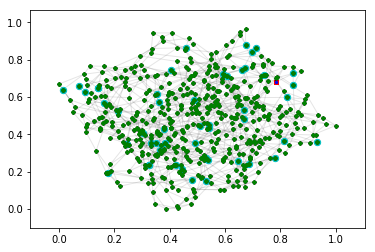

Starting infection


----DONE


In [75]:
#Run the simulation

figureList = list()
# Parameters definition
numRumors = 100
maxThreshold = 1
numMonitors = 50
propagProba = 0.7
numNodes = 500
linkProba = 0.2
monitorTrigger = list()
numStep = 100

j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)
fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')
print("Starting infection")
infections = [[] for n in range(numRumors)]
infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    #fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)
    
print("----DONE")
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))

In [75]:
# Find the maximum number of steps :
maxStep = -1
for step in monitorTrigger2:
    if step[2] > maxStep :
        maxStep = step[2]
        
        
# create array for each monitoring node
HistoDict = dict()

#Fill in the array
for monitor in monitorsList :
    HistoDict[monitor] = np.zeros((maxStep+1,1))
    for elem in monitorTrigger2 :
        if monitor == elem[0] :
            HistoDict[monitor][elem[2]] += 1
    HistoDict[monitor] = np.cumsum(HistoDict[monitor])/numRumors

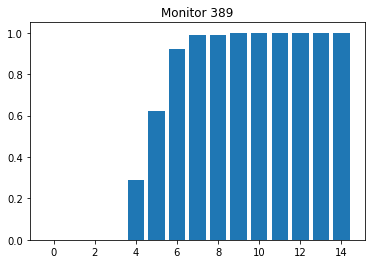

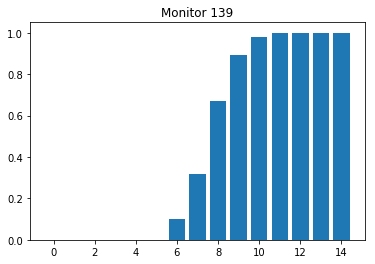

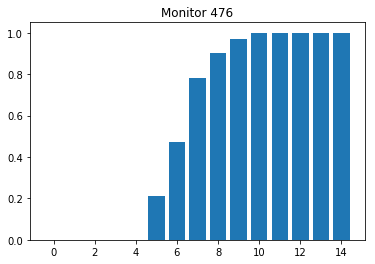

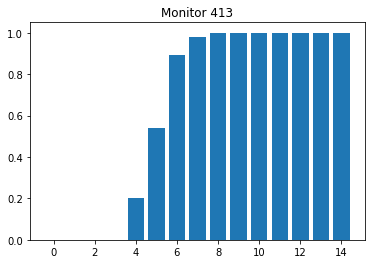

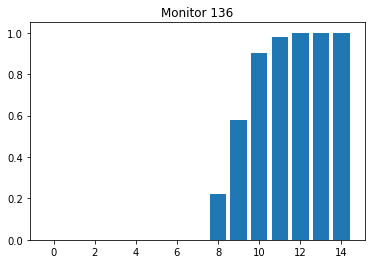

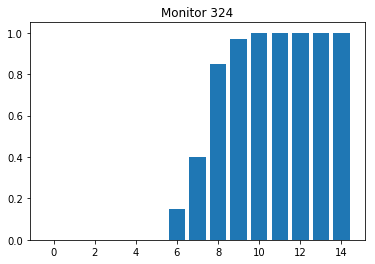

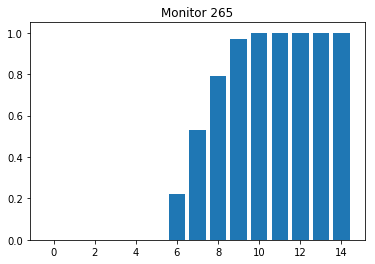

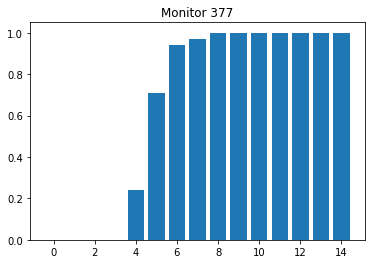

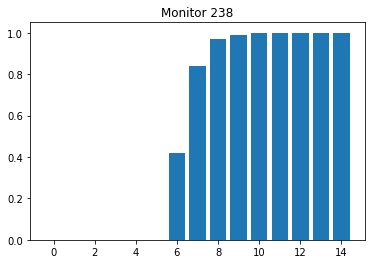

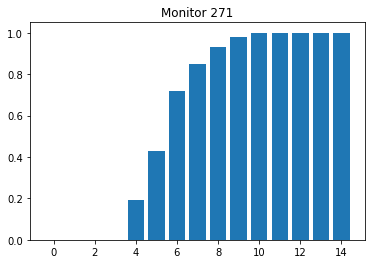

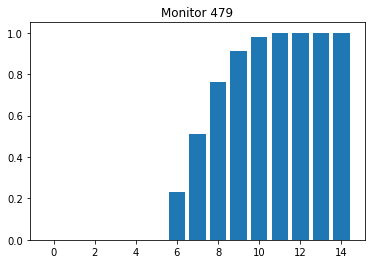

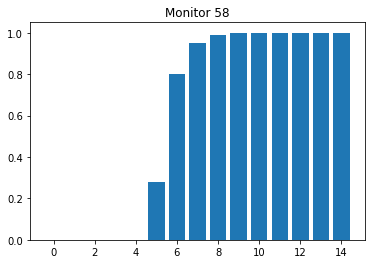

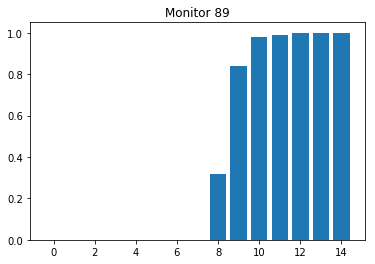

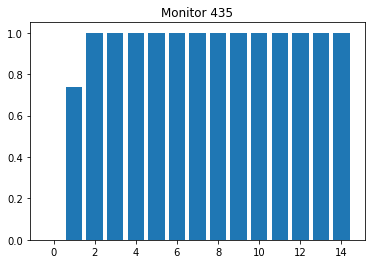

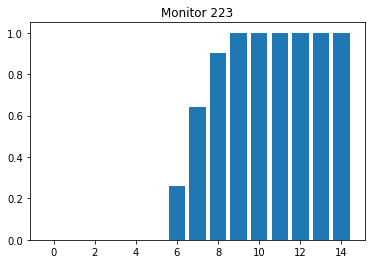

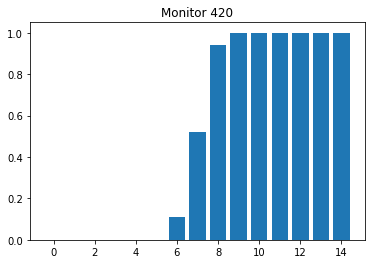

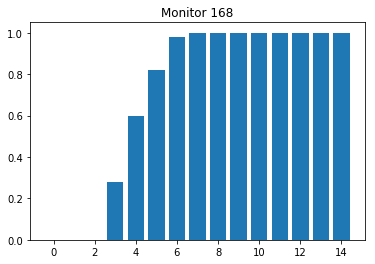

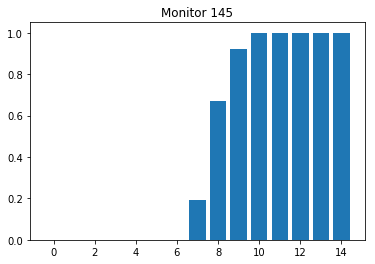

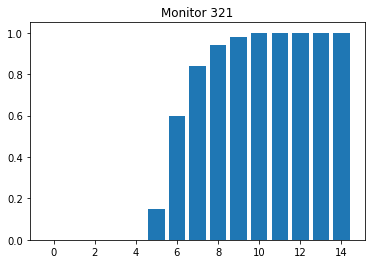

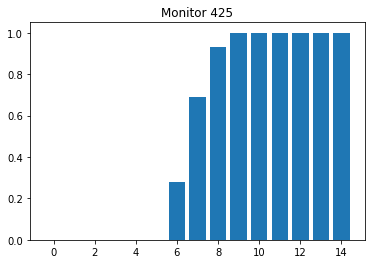

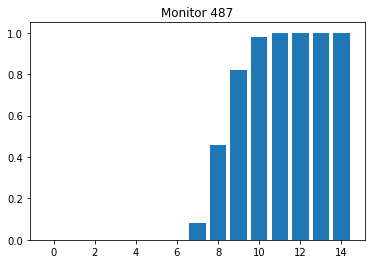

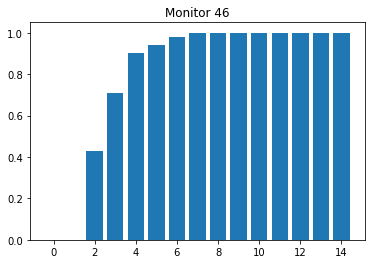

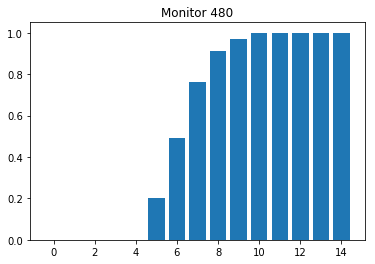

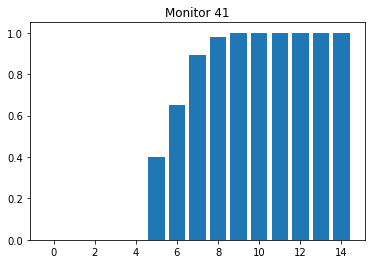

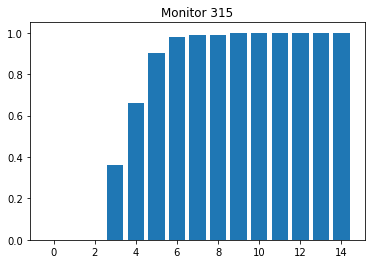

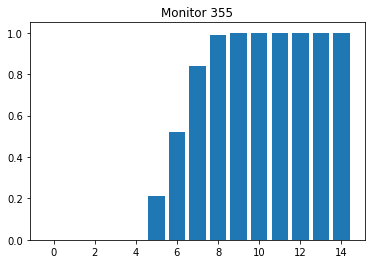

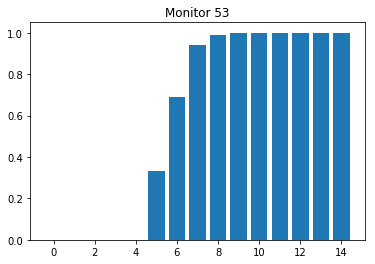

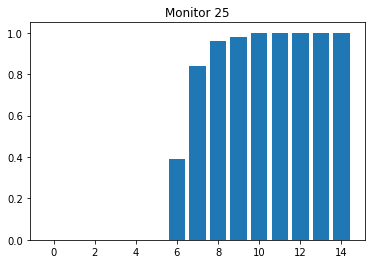

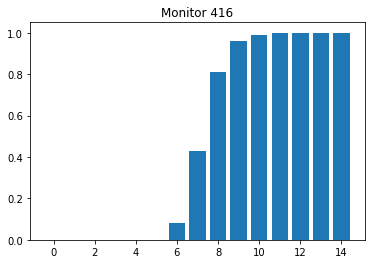

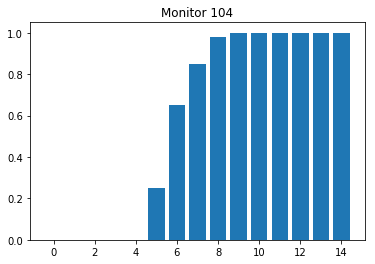

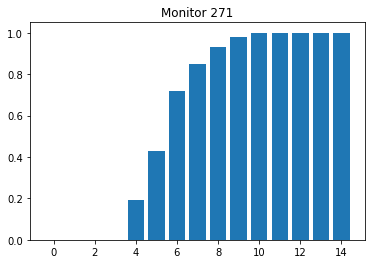

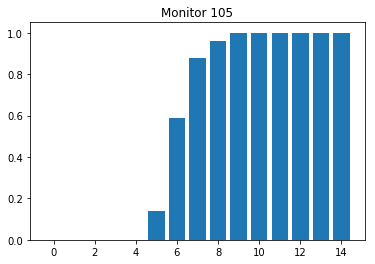

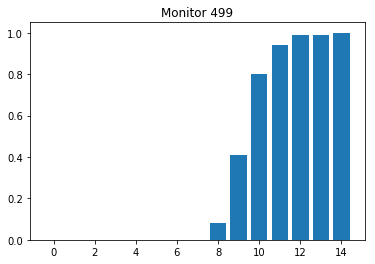

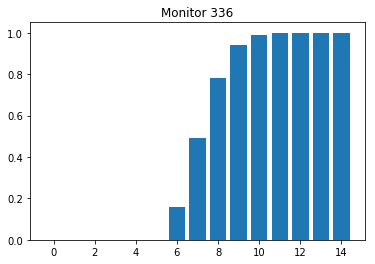

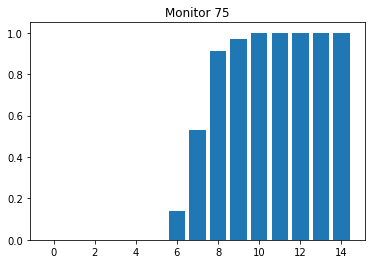

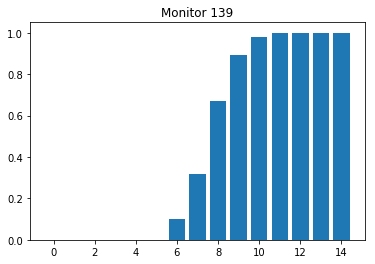

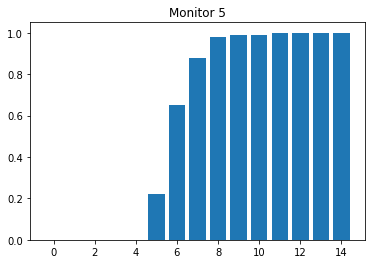

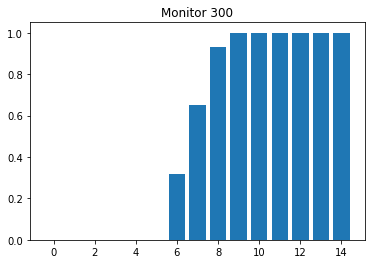

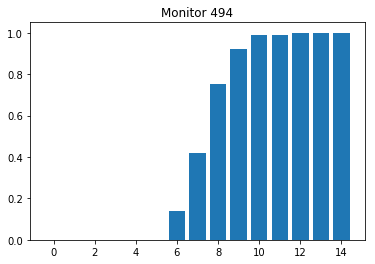

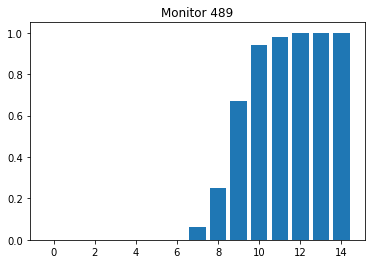

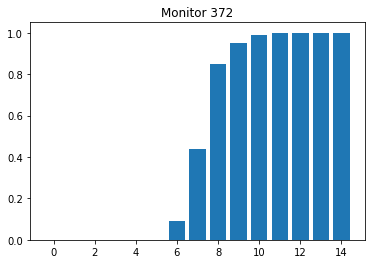

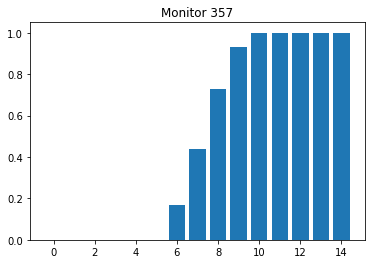

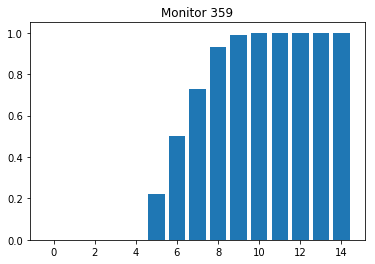

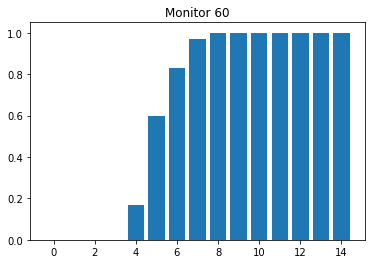

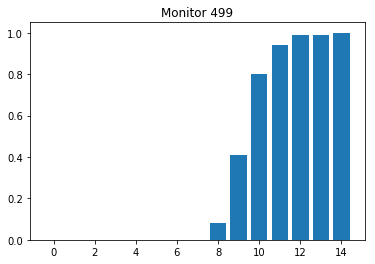

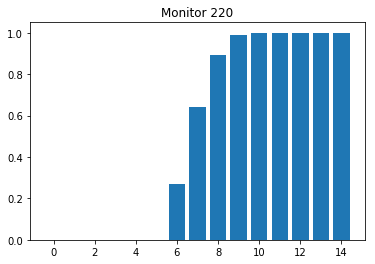

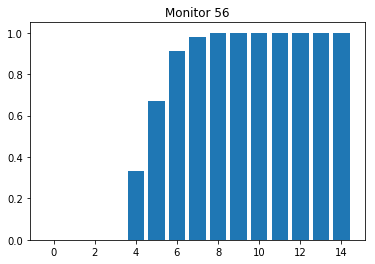

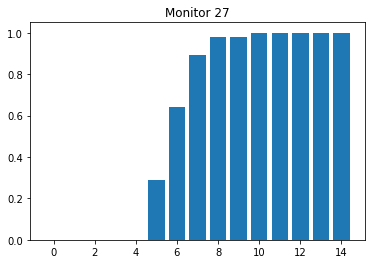

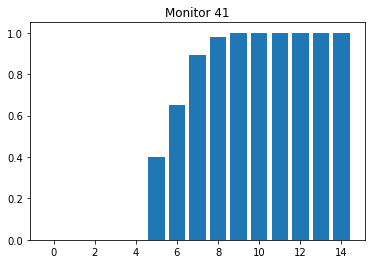

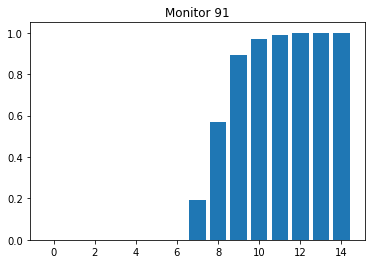

In [30]:
for m in monitorsList :
    plt.bar(range(0,maxStep+1),HistoDict[m])
    plt.title("Monitor "+str(m))
    plt.show()

In [76]:
sourceHisto = {}
monitorToTest = monitorsList[12]

for source in Graph.nodes():
    if source not in monitorsList :
        sourceHisto[source]=np.zeros((maxStep+1,1))
        for i in range(0,maxStep+1):
            sourceHisto[source][i] = calculProba(propagProba,len(nx.shortest_path(Graph,source,monitorToTest))-1,i)

In [77]:
def chiDist(histo1,histo2):

    PmQ2 = np.power(histo1-histo2,2)
    
    #prevent 0 values in division
    histo1[histo1==0]=np.finfo(float).eps
    histo2[histo2==0]=np.finfo(float).eps
    PpQ = histo1 + histo2
    vectRes = np.divide(PmQ2,PpQ)
    res = np.sum(vectRes)
    return np.sqrt(res)


dList = []
dListChi =[]

for i in Graph.nodes():
    if i not in monitorsList:
        #plt.bar(range(0,maxStep+1),sourceHisto[i])
        #plt.show()
        d = np.linalg.norm(sourceHisto[i]-HistoDict[monitorToTest])
        d2 = chiDist(sourceHisto[i],np.transpose(HistoDict[monitorToTest][np.newaxis]))
        dList.append((i,d))
        dListChi.append((i,d2))
        #print("Dist =",d)
        
dListSorted = sorted(dList,key=lambda x : x[1])
dListChiSorted = sorted(dListChi,key=lambda x : x[1])

classement = [ v[0] for v in dListSorted]
classementChi = [ v[0] for v in dListChiSorted]

print("classment de la source (L2) ",classement.index(rumorSources[0]))
print("classment de la source (Chi) ",classementChi.index(rumorSources[0]))


classment de la source (L2)  301
classment de la source (Chi)  48


[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.0823543 ]
 [ 0.25529833]
 [ 0.46283117]
 [ 0.64961072]
 [ 0.78969538]
 [ 0.88215126]
 [ 0.93762479]
 [ 0.96853147]]


0.53296268442741423